# 4. Etude sur Binary AlphaDigit

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from m2ds_deep_learning_2_project.utils import DBN, RBM, lire_alpha_digit, plot_grid, lire_MNIST, DNN, cross_entropy
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
def experiment(*chars):
    print(chars)
    X = lire_alpha_digit(*chars)
    image_size = (20, 16)
    plot_grid(X, image_size=image_size)

    Q_LIST = [2, 5, 10, 50, 100, 500, 1000]
    HISTORY_LIST = []
    for q in Q_LIST:
        hparams = {
            "p": 320,
            "q": q,
            "n_epochs": 500,
            "learning_rate": 0.1,
            "batch_size": 10,
        }

        rbm = RBM(hparams["p"], hparams["q"])

        error_history = rbm.train(
            X,
            n_epochs=hparams["n_epochs"],
            learning_rate=hparams["learning_rate"],
            batch_size=hparams["batch_size"],
            plot=False,
        )
        HISTORY_LIST.append(error_history)

        Y = rbm.generer_image(20, 10)
        plot_grid(Y, image_size=image_size)

    for i, q in enumerate(Q_LIST):
        plt.plot(HISTORY_LIST[i], label=f"q={q}")
    plt.legend()
    plt.grid()
    plt.yscale("log")
    plt.show()

('A',)


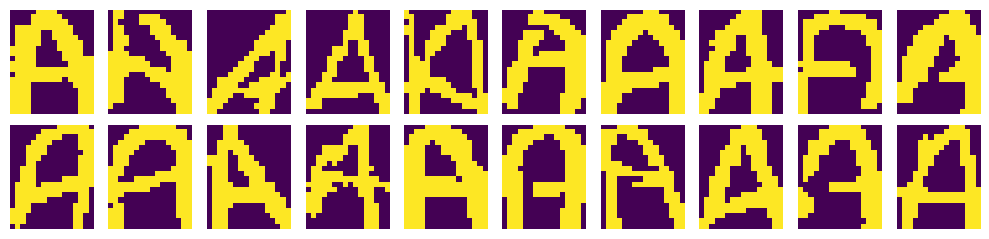

  0%|          | 0/500 [00:00<?, ?it/s]

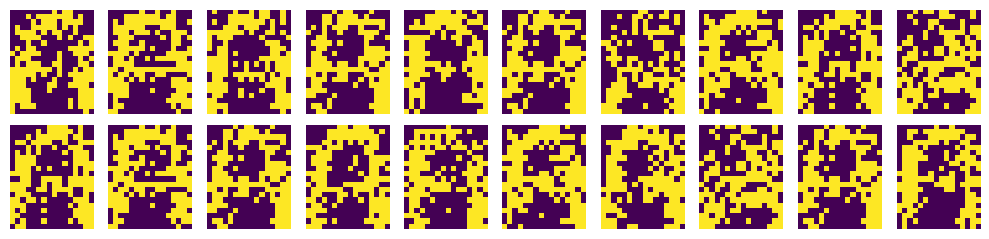

  0%|          | 0/500 [00:00<?, ?it/s]

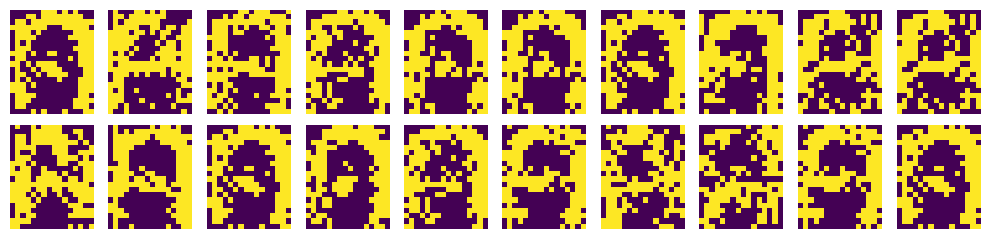

  0%|          | 0/500 [00:00<?, ?it/s]

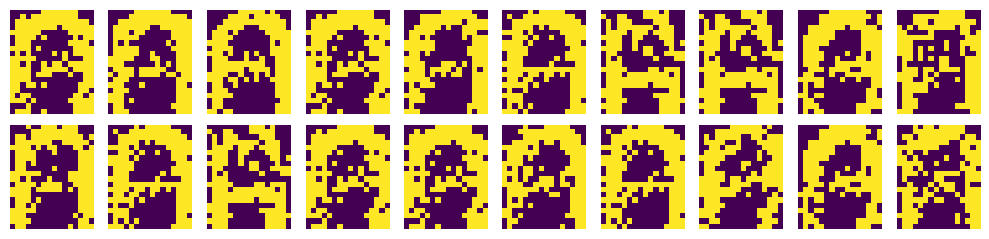

  0%|          | 0/500 [00:00<?, ?it/s]

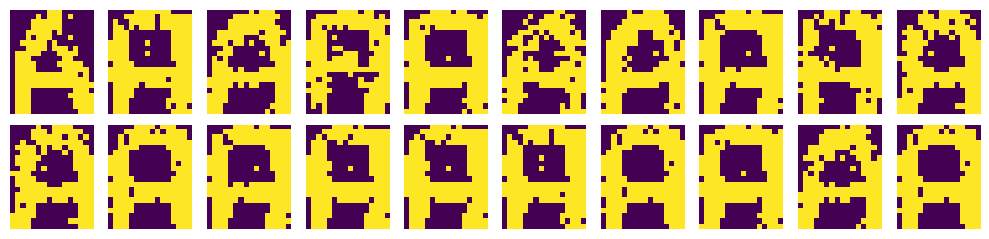

  0%|          | 0/500 [00:00<?, ?it/s]

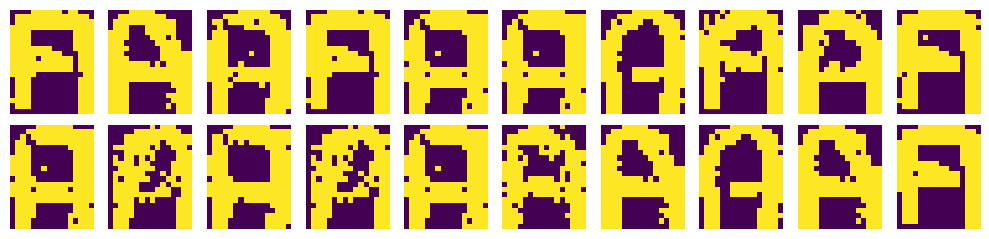

  0%|          | 0/500 [00:00<?, ?it/s]

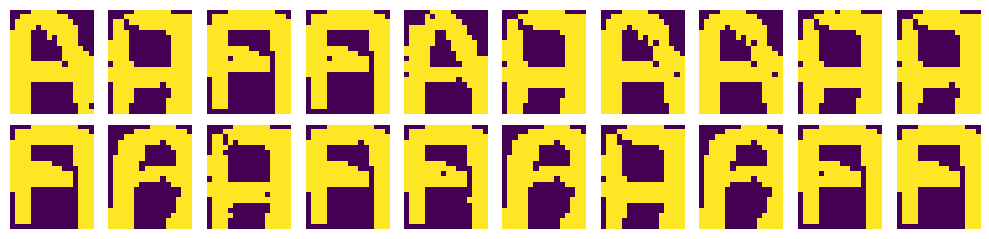

  0%|          | 0/500 [00:00<?, ?it/s]

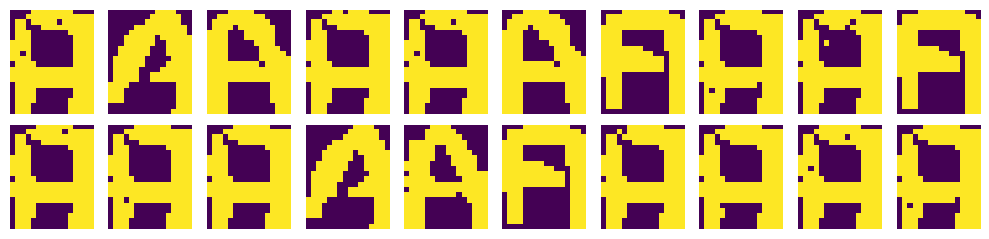

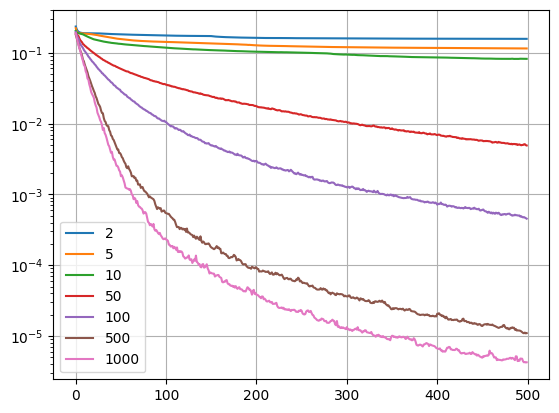

In [4]:
experiment("A")

('J', 'Q', 'F', 'Y', 'Z')


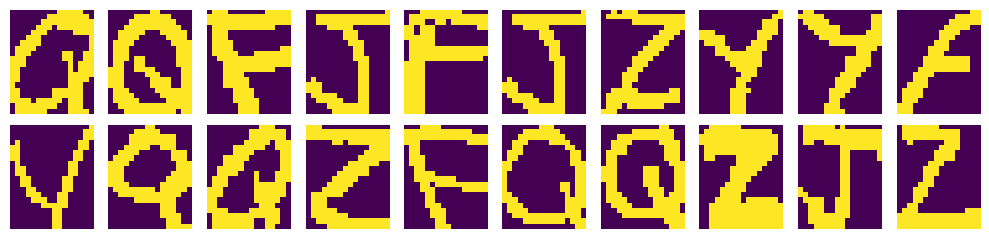

  0%|          | 0/500 [00:00<?, ?it/s]

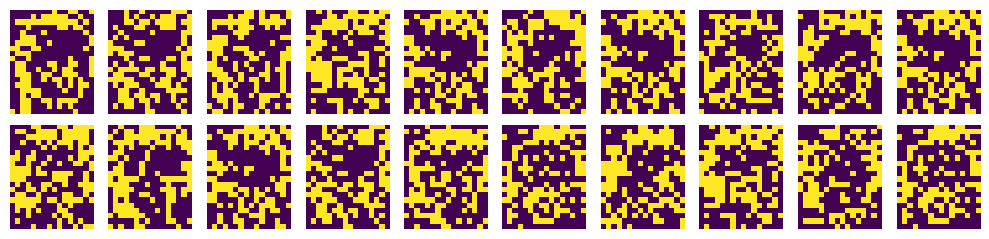

  0%|          | 0/500 [00:00<?, ?it/s]

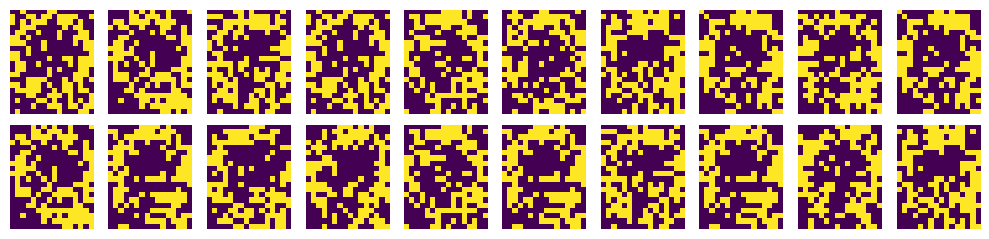

  0%|          | 0/500 [00:00<?, ?it/s]

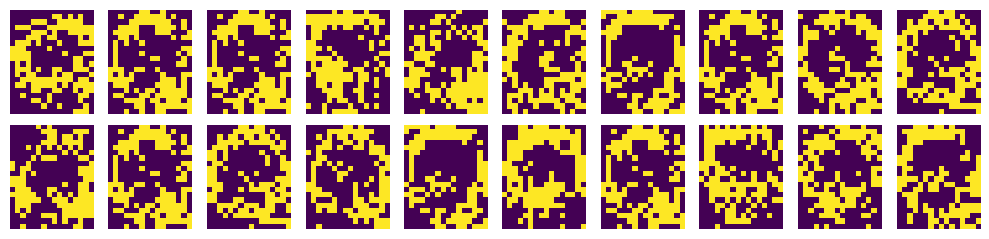

  0%|          | 0/500 [00:00<?, ?it/s]

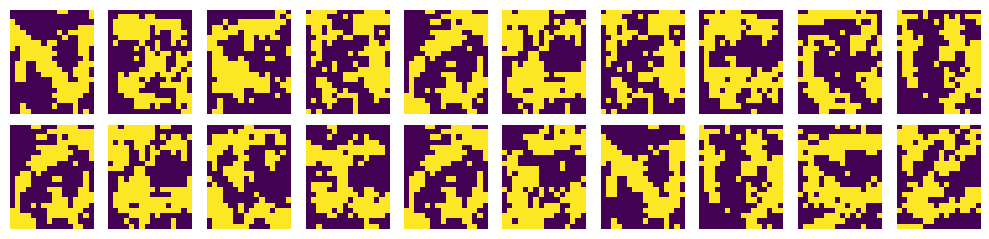

  0%|          | 0/500 [00:00<?, ?it/s]

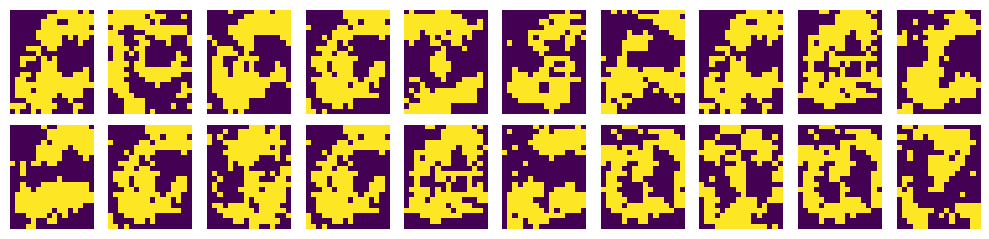

  0%|          | 0/500 [00:00<?, ?it/s]

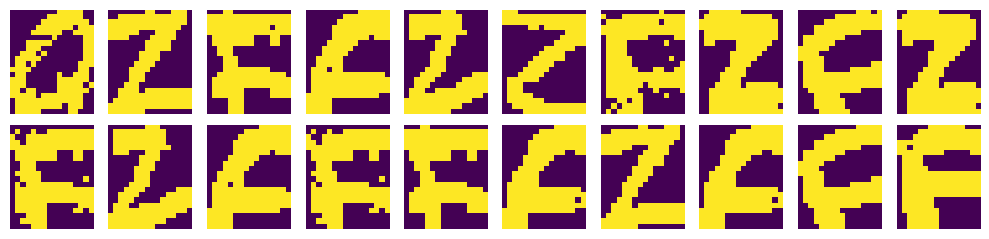

  0%|          | 0/500 [00:00<?, ?it/s]

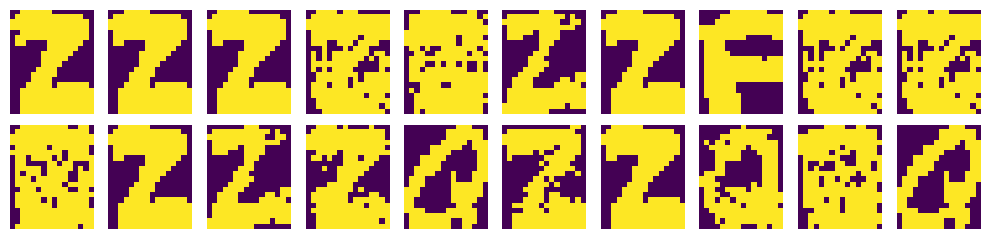

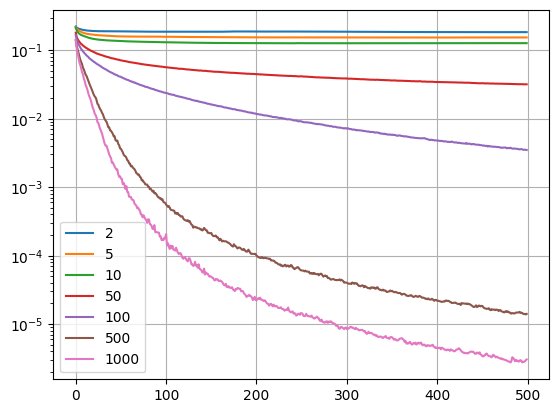

In [5]:
import string
ALL_CHARS = list(string.ascii_uppercase + string.digits)

experiment(*random.sample(ALL_CHARS, 5))

('9', 'H', 'C', 'K', 'A', '6', 'P', 'D', '4', 'R')


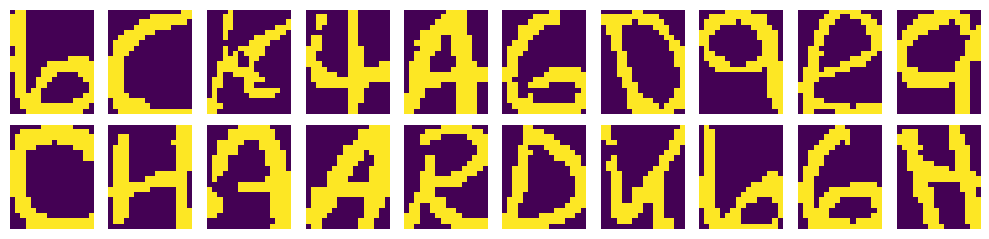

  0%|          | 0/500 [00:00<?, ?it/s]

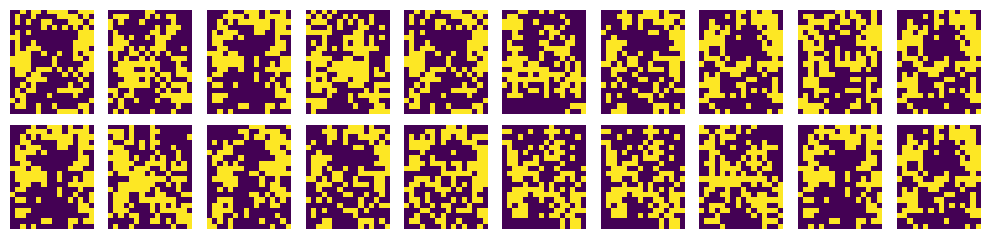

  0%|          | 0/500 [00:00<?, ?it/s]

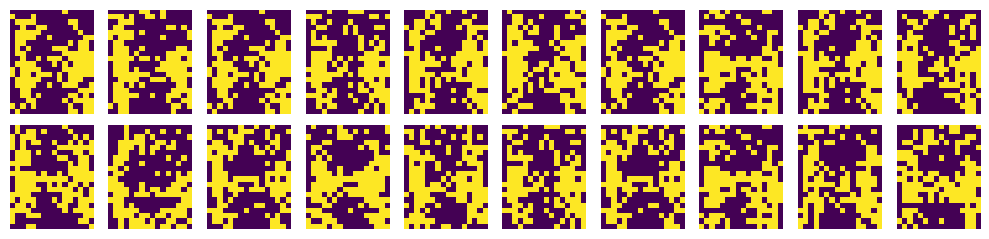

  0%|          | 0/500 [00:00<?, ?it/s]

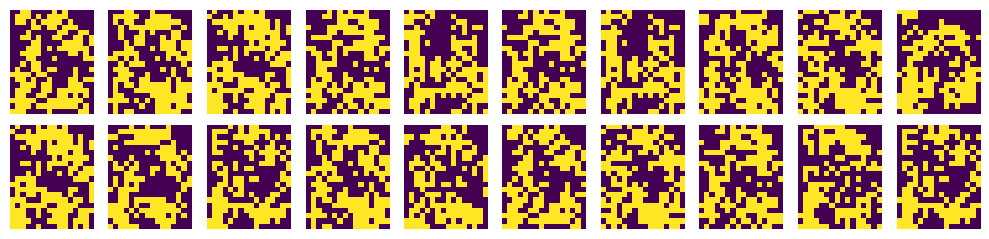

  0%|          | 0/500 [00:00<?, ?it/s]

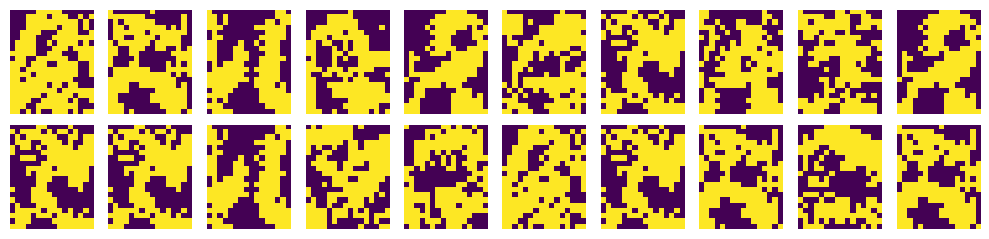

  0%|          | 0/500 [00:00<?, ?it/s]

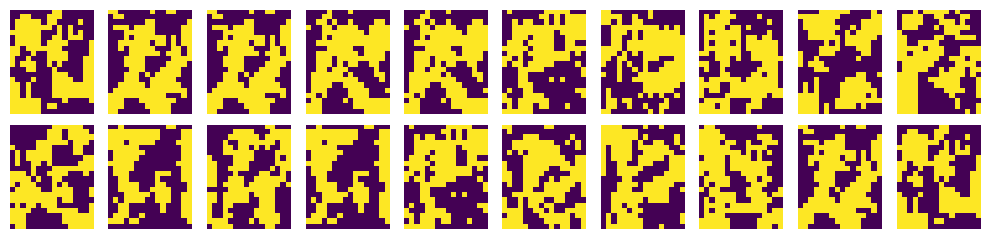

  0%|          | 0/500 [00:00<?, ?it/s]

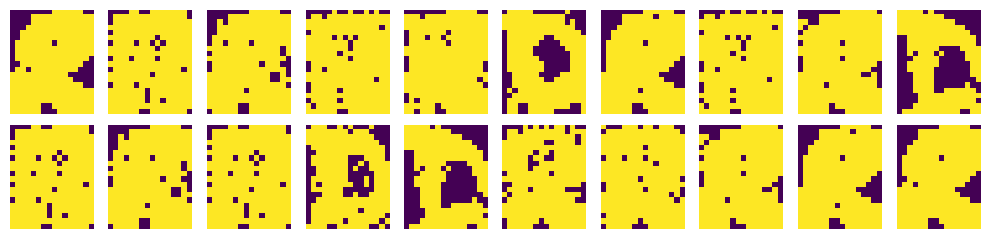

  0%|          | 0/500 [00:00<?, ?it/s]

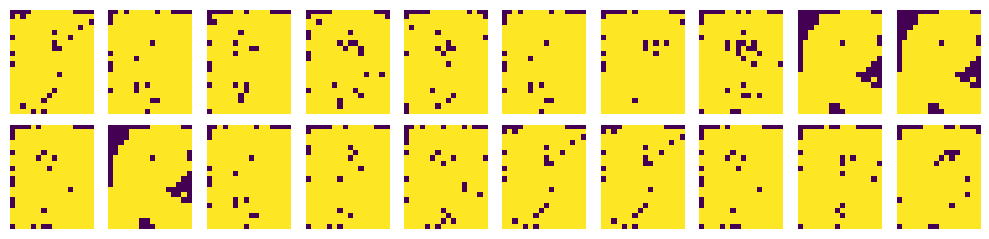

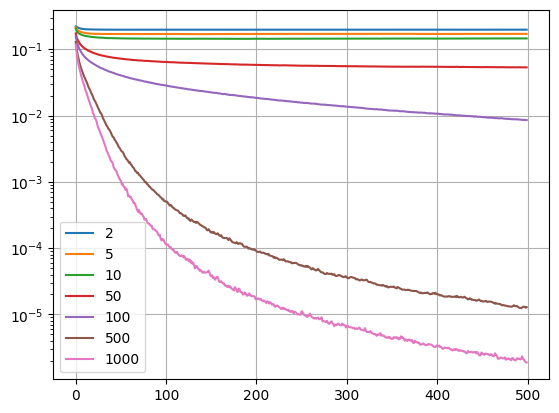

In [8]:
experiment(*random.sample(ALL_CHARS, 10))

('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9')


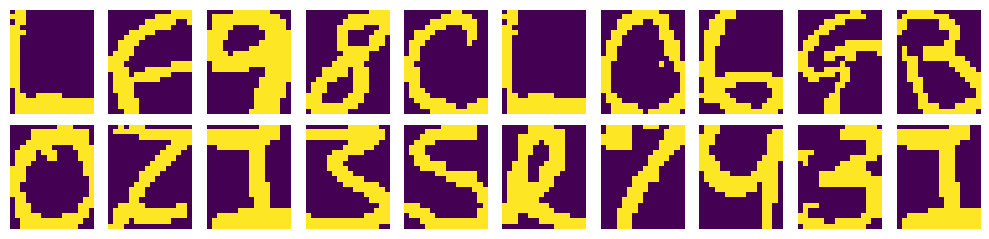

  0%|          | 0/500 [00:00<?, ?it/s]

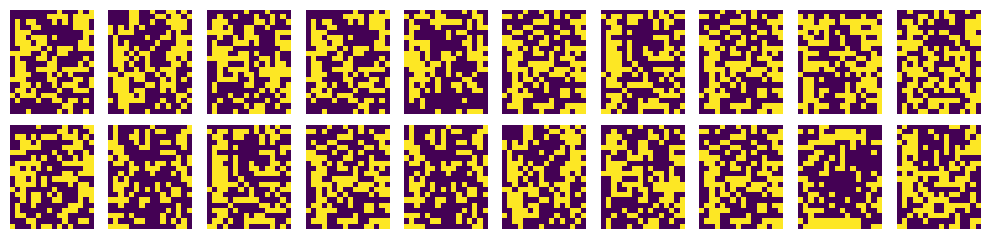

  0%|          | 0/500 [00:00<?, ?it/s]

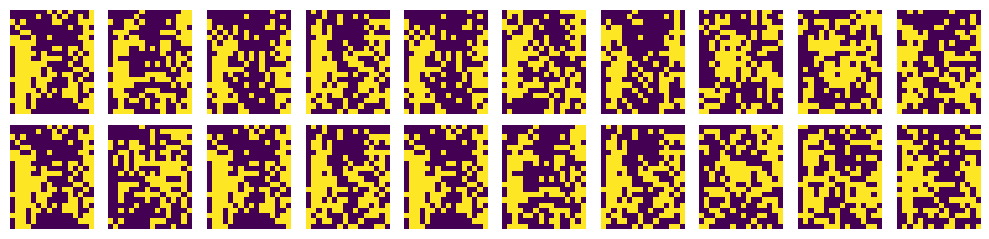

  0%|          | 0/500 [00:00<?, ?it/s]

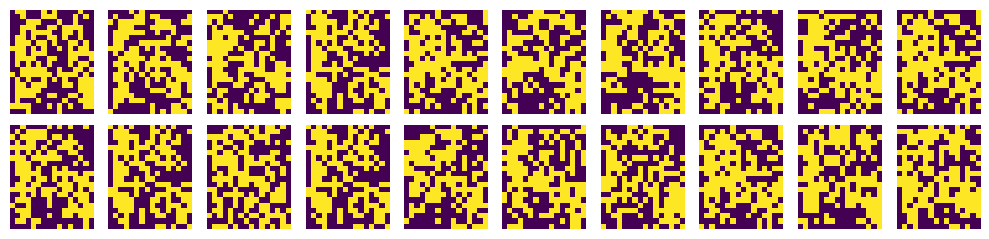

  0%|          | 0/500 [00:00<?, ?it/s]

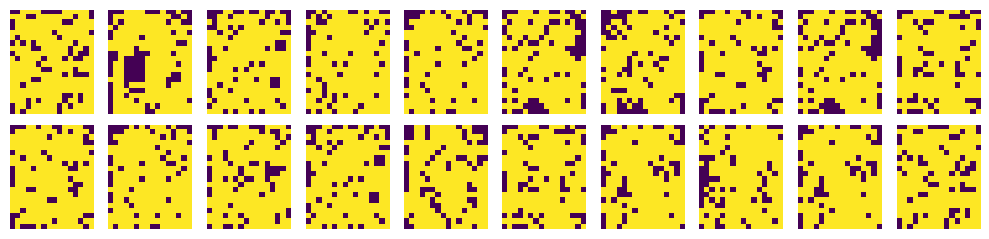

  0%|          | 0/500 [00:00<?, ?it/s]

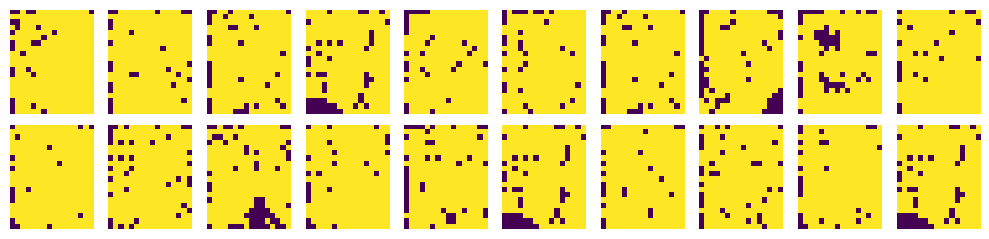

  0%|          | 0/500 [00:00<?, ?it/s]

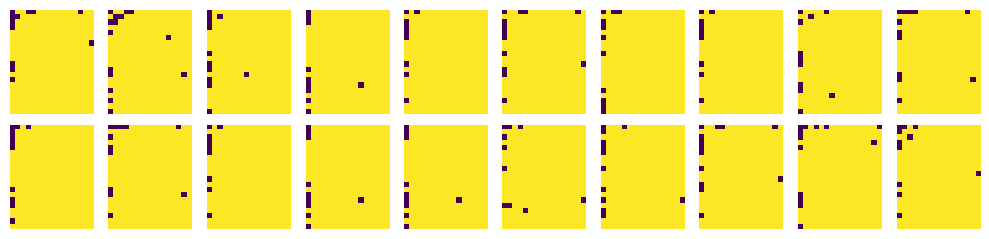

  0%|          | 0/500 [00:00<?, ?it/s]

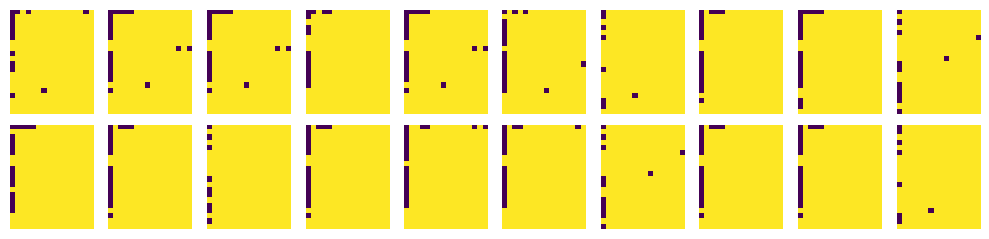

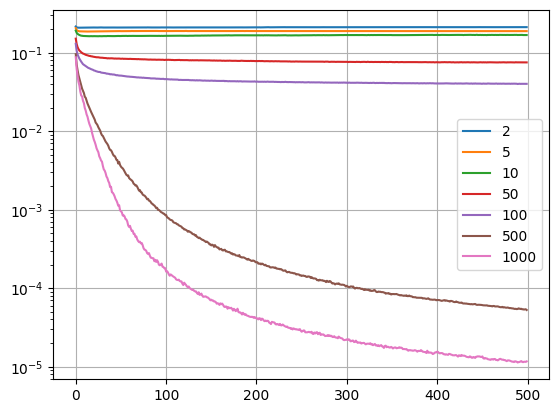

In [9]:
experiment(*ALL_CHARS)